csv 가져오기
csv 불러오기
text_data 저장
model 로드
벡터 변환
KMeans 클러스터 4개 생성, 랜덤 스테이트 42


c:\Users\SMHRD\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans에 벡터 학습
클러스터 결과 확인


C:\Users\SMHRD\AppData\Local\Temp\ipykernel_1504\3173329166.py:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], c=cluster_color, cmap='viridis')


Text(0.5, 0.92, 'Cluster Distribution (3D)')

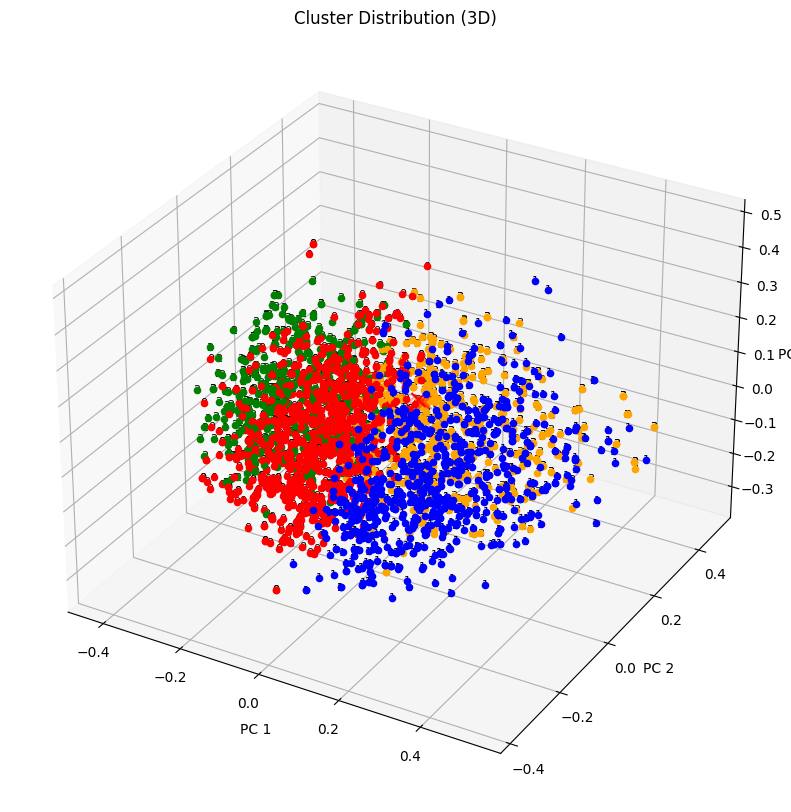

In [3]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch

# CSV 파일 경로
csv_file_path = "D:\모델실습\로맨스 웹소설 정보 데이터.csv"
print("csv 가져오기")

# CSV 파일 불러오기
df = pd.read_csv(csv_file_path)
print("csv 불러오기")

# "title"과 "synopsis" 열 선택하여 텍스트 데이터로 저장
text_data = df["title"] + " " + df["synopsis"]
print("text_data 저장")

# KoBERT 모델 로드 (1024차원)
model = SentenceTransformer('all-MiniLM-L12-v2')
model.to('cuda')
print("model 로드")

# 텍스트 데이터를 벡터로 변환
vectors = model.encode(text_data, convert_to_tensor=True)
vectors = vectors.to('cuda')
print("벡터 변환")

# K-Means 클러스터링 모델 생성
kmeans = KMeans(n_clusters=4, random_state=42)
print("KMeans 클러스터 4개 생성, 랜덤 스테이트 42")

# 클러스터링 수행
kmeans.fit(vectors.cpu().detach().numpy())
print("KMeans에 벡터 학습")

# 클러스터링 결과 확인
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("클러스터 결과 확인")

# 차원 축소 (3차원으로 표현하기 위해 PCA 사용)
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(vectors.cpu().detach().numpy())

# 클러스터별 데이터 개수 계산
cluster_counts = {}
for label in labels:
    if label in cluster_counts:
        cluster_counts[label] += 1
    else:
        cluster_counts[label] = 1

# 군집도 시각화
# 클러스터 수 == 넣는 색상 리스트
colors = ['red', 'blue', 'green', 'orange']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i, label in enumerate(labels):
    cluster_color = colors[label % len(colors)]  # 색상 선택
    ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], c=cluster_color, cmap='viridis')
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], str(label), fontsize=8, ha='center', va='center')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='red', s=100, label='Centroids')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Cluster Distribution (3D)')
